# Modelling Differential Equations in Python
> The first in a series of tutorials to model ODEs and systems of ODEs in Python.

- toc: true 
- badges: true
- comments: true
- author: Darpan Ganatra
- categories: [jupyter, python, modelling, comp_bio]
- image: images/chart-preview.png

# Introduction
I've long been interested in modelling biological systems with mathematics. This is going to be a series which goes over how to do that (for simple systems of course). 

# Single Differential Equation (Decay)

The first differential differential equation we're going to look at is simple exponential decay: 
$$
\dfrac{dy}{dt} = -y
$$

The solution to this ODE is going to be relatively simple to find: 

$$
\begin{align}
\dfrac{dy}{dt} &= -y \\
- \int \dfrac{1}{y} dy &= \int 1 dt \\
- ln(y) + k_{1} &= t + k_{2} \\
ln(y) &= -t + k_{3} \\
y &= Ke^{-t}
\end{align}
$$

In this case, we have one parameter that we dont know, and that is the value of $K$. We can find this with an initial condition. So for example if $y(0) = 1$ then we'd have that

$$
\begin{align}
y(0) &= 1 = Ke^{-0} \\
1 &= K
\end{align}
$$

Cool. Now let's see how we can build this model and plot the solution: 

In [61]:
#collapse-hide
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 12})

First thing we need to work through is how to define the model. We'll be using `solve_ivp` rather than `odeint` from the `scipy.integrate` library. Why? Because `odeint` is now outdated. I'll provide a refrence to this later. 

In the case of `solve_ivp`, we need to create our model with three things: 
1. $t$: The time
2. $y$: The variable
3. Other arguments

At this second, we're going to ignore that last thing, because it's not necessary for us (yet).

Here's how we can model decay:

In [3]:
def decay_model(t,y):
    """
    Simple decay model
    dy/dt = -y
    """
    return -y

Now that we have our model created, we can feed it into `solve_ivp`. To do this, we need to determine a few things. Specifically: 
1. `t_span`: The time over which we want to evaluate
2. `y0`: The initial value of our function
3. `dense_output`: Whether we want our output to be smooth

Now there are many other options in `solve_ivp`, but for now we'll go over these, just so we can get familiar. 

We can set the `t_span` to be from $t = 0$ to $t = 10$, which we denote with a tuple. We can set our initial value to be 1 (like we showed above), and we want a dense output. Just to throw a curve ball in there (and not put ourselves to sleep) I'll solve it for a variety of different initial values: 

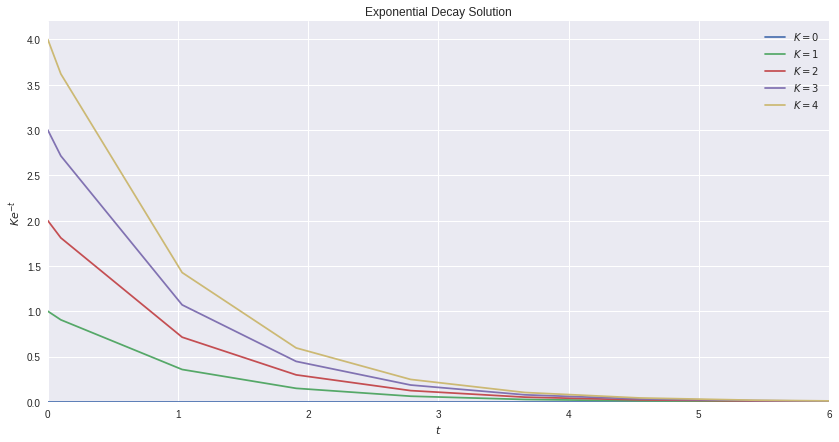

In [68]:
solution_array = list()

fig, ax = plt.subplots(figsize = (14,7))
for i in range(0, 5):     
    solution = solve_ivp(fun = decay_model,
                         t_span = [0, 6],
                         y0 = [i], 
                         dense_output=True)

    ax.plot(solution.t, solution.y[0], label = fr"$K = {i}$")
ax.set_title("Exponential Decay Solution")
ax.set_ylabel(r'$Ke^{-t}$')
ax.set_xlabel(r'$t$')
ax.set_xlim(left = 0, right = max(solution.t))
ax.set_ylim(bottom = 0)
ax.legend()
plt.show()

Now I realize, this was extremely exciting and you just can't wait for more. Don't worry, next time we'll implement an SIR model. And maybe mess with the populations a bit.